In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from fast_histogram import histogram1d

In [2]:
nightlight_fname = "south_middle"

driver = gdal.GetDriverByName('GTiff')
filename = "../data/input/Nightlights/2016/"+nightlight_fname+".tif" #path to raster
dataset = gdal.Open(filename)
band = dataset.GetRasterBand(1)

cols = dataset.RasterXSize
rows = dataset.RasterYSize

In [3]:
transform = dataset.GetGeoTransform()

xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = -transform[5]

print("xOr: ", xOrigin)
print("yOr: ", yOrigin)
print("pW: ", pixelWidth)
print("pH: ", pixelHeight)


data = band.ReadAsArray(0, 0, cols, rows)

xOr:  -60.00208333335
yOr:  0.00208333335
pW:  0.0041666667
pH:  0.0041666667


In [4]:
np_data = np.array(data)

In [5]:
print(np.min(np_data))
print(np.max(np_data))

0.0
11059.386


In [6]:
bins = 50
hist = histogram1d(np_data, bins=bins, range=[0,1])

In [7]:
print(hist)

[4.45543188e+08 0.00000000e+00 2.94410000e+04 7.61850000e+04
 9.97970000e+04 1.17728000e+05 1.26909000e+05 1.30556000e+05
 1.28390000e+05 1.22489000e+05 1.15322000e+05 1.07863000e+05
 9.97750000e+04 9.22980000e+04 8.61440000e+04 7.97370000e+04
 7.33080000e+04 6.83310000e+04 6.35420000e+04 5.94160000e+04
 5.52600000e+04 5.17040000e+04 4.83590000e+04 4.53260000e+04
 4.25840000e+04 3.98020000e+04 3.75600000e+04 3.60230000e+04
 3.33360000e+04 3.20200000e+04 3.01020000e+04 2.84980000e+04
 2.74320000e+04 2.60350000e+04 2.48780000e+04 2.35370000e+04
 2.28540000e+04 2.15290000e+04 2.06770000e+04 1.98530000e+04
 1.90370000e+04 1.83100000e+04 1.76250000e+04 1.70080000e+04
 1.65930000e+04 1.56570000e+04 1.51800000e+04 1.46290000e+04
 1.41930000e+04 1.38290000e+04]


In [8]:
x = np.arange(0,1,1/bins)

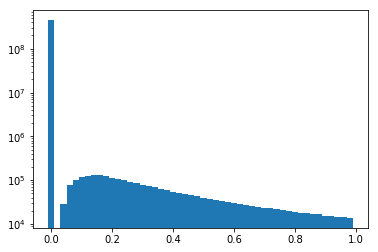

In [9]:
plt.bar(x, hist, width=1/bins)
plt.semilogy()
plt.show()

In [10]:
nz = np.count_nonzero(np_data)
print(nz/(np_data.shape[0]*np_data.shape[1]))
print("Nonzero: %.3f %%" % ((nz/(np_data.shape[0]*np_data.shape[1]))*100))

0.008317334401709401
Nonzero: 0.832 %


In [11]:
(np.sum(hist)-hist[0])/np.sum(hist)

0.005594602934460536

In [12]:
print(np.sum(hist))
print(np_data.shape[0]*np_data.shape[1])

448049849.0
449280000


In [17]:
remaining = np.sum(hist[1:])
blocks = 2
steps = [1]
for i in range(blocks-1):
    cs = 0
    for mid in range(steps[-1],len(hist)):
        if cs+hist[mid] > remaining/(blocks-i):
            break
        cs += hist[mid]
    steps.append(mid)
    remaining -= cs
print(steps)
steps.append(bins)
for i in range(1,len(steps)):
    print("%d - %d " % (steps[i-1],steps[i]))
    print("%d " % np.sum(hist[steps[i-1]:steps[i]]))


[1, 14]
1 - 14 
1246753 
14 - 50 
1259908 


In [18]:
x[steps[:-1]]

array([0.02, 0.28])